<a href="https://colab.research.google.com/github/AceDebnath/WaterQualityPrediction/blob/main/Copy_of_waterQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load your dataset

In [ ]:
df = pd.read_csv('/content/afa2e701598d20110228(2).csv', sep=';')
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


# Step 3: Basic EDA

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB
None
                id          NH4         BSK5    Suspended           O2  \
count  2861.000000  2858.000000  2860.000000  2845.000000  2858.000000   
mean     12.397064     0.758734     4.316182    12.931905     9.508902   
std       6.084226     2.486247     2.973997    16.543097     4.428260   
min     

# Check for missing values

In [ ]:
df.isnull().sum()

,0
id,0
date,0
NH4,3
BSK5,1
Suspended,16
O2,3
NO3,1
NO2,3
SO4,49
PO4,28


# Optional: visualize correlations

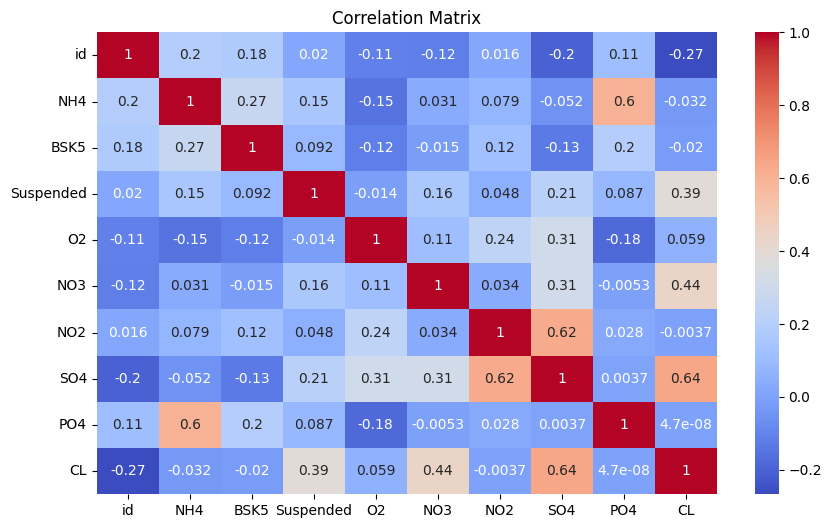

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 4: Feature Engineering

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


/tmp/ipython-input-38-2786807189.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
# Select input features and target columns
features = ['id', 'year']  # Add 'month' if needed
targets = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']  # Your pollutants

In [ ]:
X = df[features]
y = df[targets]

# Drop rows with missing values in target variables
data = pd.concat([X, y], axis=1).dropna(subset=targets)
X = data[features]
y = data[targets]

# Step 5: Encode 'id' (station) using OneHotEncoder

In [ ]:
X = pd.get_dummies(X, columns=['id'])
X.head()

,year,id_1,id_2,id_3,id_4,id_5,id_6,id_7,id_8,id_9,...,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22
0,2000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2001,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Step 6: Split data and train model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: -2.2273718872155106
RMSE: 78.38484187718272


# Step 7: Make a custom prediction

In [ ]:
def predict_pollutants(year, station_id):
    input_df = pd.DataFrame({'year': [year], 'id': [station_id]})
    input_encoded = pd.get_dummies(input_df, columns=['id'])

    # Align input with training columns
    for col in X.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[X.columns]

    prediction = model.predict(input_encoded)[0]
    result = dict(zip(targets, prediction))
    return result


In [ ]:
# Example
year_input = 2022
station_input = '1'
prediction = predict_pollutants(year_input, station_input)
print(f"Predicted pollutants for Station {station_input} in {year_input}:")
for k, v in prediction.items():
    print(f"{k}: {v:.2f}")

Predicted pollutants for Station 1 in 2022:
O2: 10.94
NO3: 1.94
NO2: 0.18
SO4: 507.48
PO4: 0.46
CL: 2796.40


In [ ]:
import joblib

# Save the model and columns
joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']